In [1]:
# example adapted from
# https://matplotlib.org/stable/gallery/images_contours_and_fields/plot_streamplot.html

from utils import *
from phase_io import get_portrait_data_type
from phase_portrait_dataset import PortraitDataset
from numpy import linalg as LA

In [2]:
# get portrait data
portrait_data_type, data_type_exists = get_portrait_data_type()
if not data_type_exists:
    assert data_type_exists, "Given data type is not defined!"
portrait_dataset = PortraitDataset(portrait_data_type)
data = portrait_dataset.get_portrait_data()

In [3]:
# print matrix A with its eigenvalues and eigenvectors
A = data["A"]
eig_values, eig_vectors = LA.eig(A)
print("eig_values:", eig_values)
print("eig_vectors:", eig_vectors)

eig_values: [-0.1 -0.2]
eig_vectors: [[1. 0.]
 [0. 1.]]


In [4]:
# define notebook parameters
w = 1
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

[1 0] [0.00672111 0.        ] 50.0
[-1  0] [-0.00672111  0.        ] 50.0
[0 1] [0.00000000e+00 4.49475927e-05] 50.0
[ 0 -1] [ 0.00000000e+00 -4.49475927e-05] 50.0
[1 1] [6.72111196e-03 4.49475927e-05] 50.0
[ 1 -1] [ 6.72111196e-03 -4.49475927e-05] 50.0
[-1  1] [-6.72111196e-03  4.49475927e-05] 50.0
[-1 -1] [-6.72111196e-03 -4.49475927e-05] 50.0


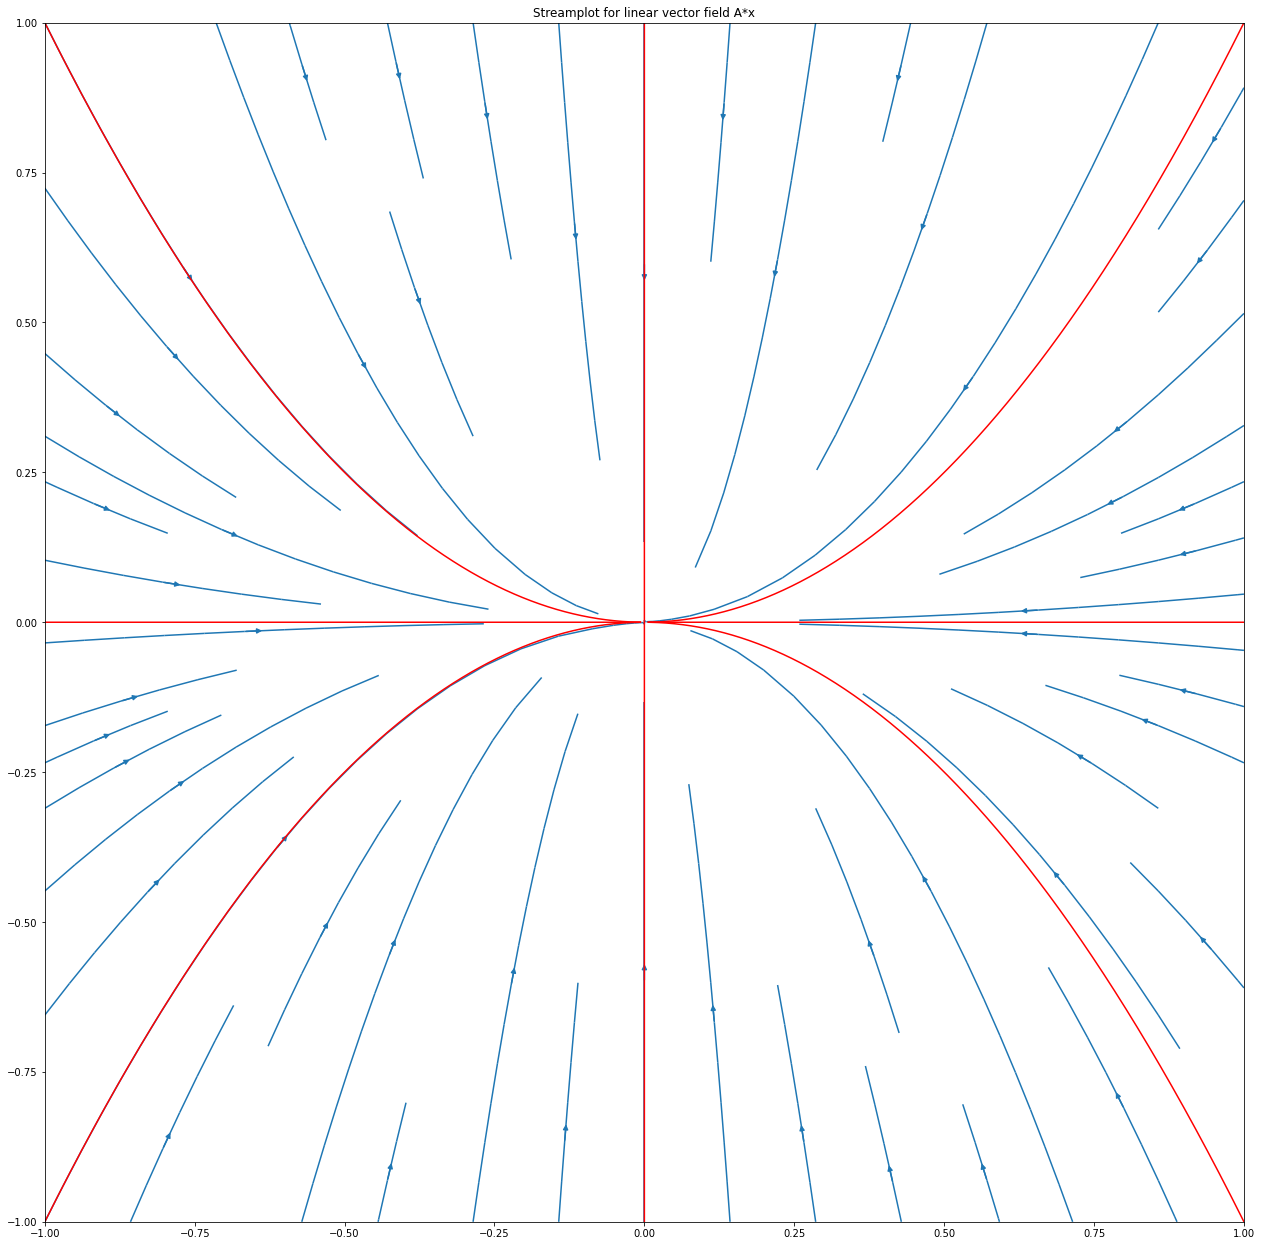

In [5]:
# example linear vector field A*x
fig, ax0 = plot_phase_portrait(A, X, Y)

trajectories = data["trajectories"]
for trajectory in trajectories:
    # retrieve config values
    y0 = trajectory["y0"]
    timespan_time = trajectory["timespan"]["time"]
    timespan_freq = trajectory["timespan"]["freq"]
    plot_color = trajectory["plot"]["color"]
    plot_label = trajectory["plot"]["label"]

    # example for Euler's method to construct and plot a trajectory over the stream plot
    time = np.linspace(0, timespan_time, int(timespan_time*timespan_freq)+1)
    yt, time = solve_euler(lambda y: A@y, y0, time)
    len_y = len(yt)
    print(y0, yt[len_y-1], time[len_y-1])

    # then plot the trajectory over it
    ax0.plot(yt[:, 0], yt[:, 1], c=plot_color, label=plot_label)

# prettify
# ax0.legend()
ax0.set_aspect(1)